importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loading the dataset into pandas dataframe

In [2]:
data=pd.read_csv(r'C:\Users\OMEN\Downloads\Fraud.csv')

getting the basic info of the data

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
data.shape

(6362620, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Since there is no missing values so no need to handle them

**OUTLIER DETECTION**

In [9]:
numerical_data = data.select_dtypes(include=['int64','float64']).columns


In [10]:
Q1 = data[numerical_data].quantile(0.25)
Q3 = data[numerical_data].quantile(0.75)
IQR = Q3 - Q1

outliers = ((data[numerical_data] < (Q1 - 1.5 * IQR)) | (data[numerical_data] > (Q3 + 1.5 * IQR)))

print(outliers.sum())


step               102688
amount             338078
oldbalanceOrg     1112507
newbalanceOrig    1053391
oldbalanceDest     786135
newbalanceDest     738527
isFraud              8213
isFlaggedFraud         16
dtype: int64


In [11]:
print(outliers.sum())

step               102688
amount             338078
oldbalanceOrg     1112507
newbalanceOrig    1053391
oldbalanceDest     786135
newbalanceDest     738527
isFraud              8213
isFlaggedFraud         16
dtype: int64


In [12]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [13]:
data['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

data is hieghly imbalaanced

And has very less points as flagged for fraud

In [14]:
data['isFraud'].value_counts(dropna=False, normalize=True)


isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64

In [15]:
data['isFraud'].unique()


array([0, 1])

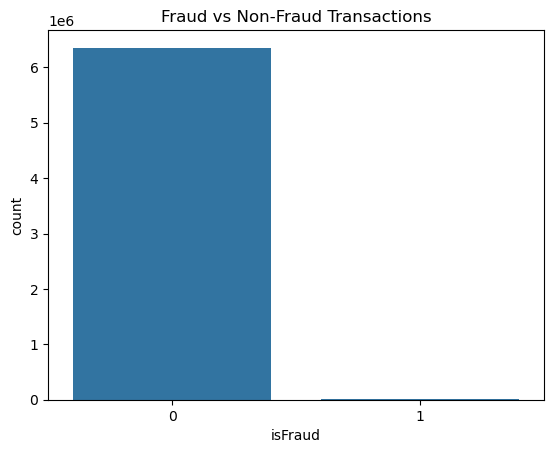

In [16]:
sns.countplot(x='isFraud', data=data)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()


from here we can conclude that the dataset is hieghly imbalanced

so from here we have two options weather to undersample or to oversample so in undersampling there would be waste of data points so i preffer to oversample for training purpose

analyzing the transaction types

<Axes: xlabel='type', ylabel='Count'>

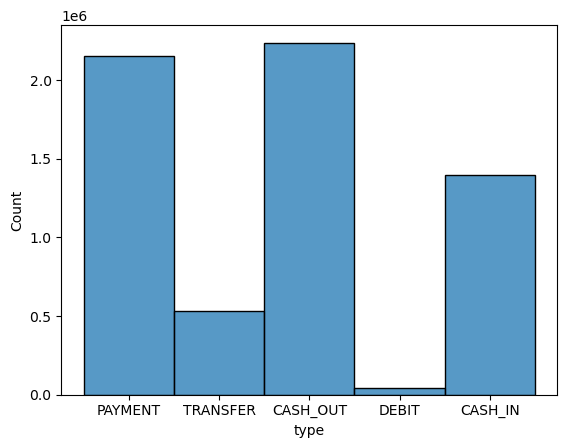

In [17]:
sns.histplot(data=data,x='type')

we can conclude that the cash out is having heighest count followed by payment cash in transfer and debit(least)

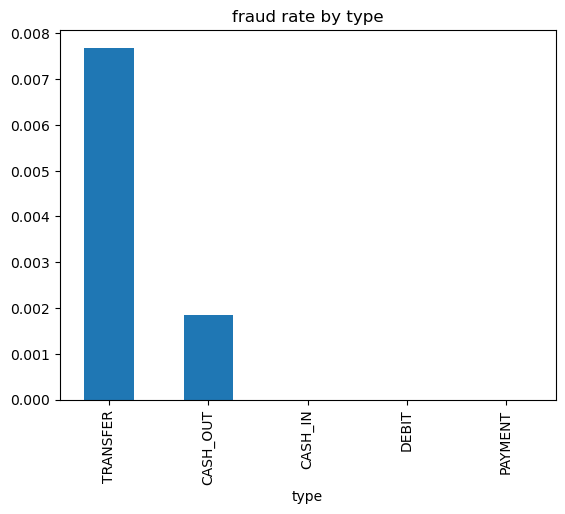

In [18]:
fraudgroup=data.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraudgroup.plot(kind='bar',title='fraud rate by type')
plt.y_label=('fraud_rate')
plt.show()

In [19]:
data['amount'].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

Text(0.5, 1.0, 'Log Transformed Amount Distribution')

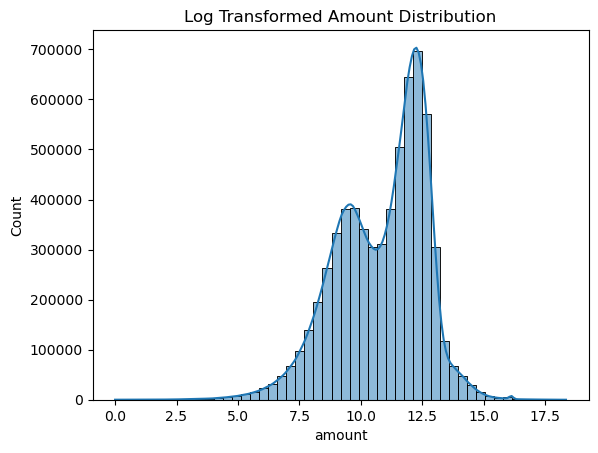

In [20]:
sns.histplot(np.log1p(data['amount']),bins=50 ,kde=True)# normalizing the amount column using log transformation
plt.title('Log Transformed Amount Distribution')

In [21]:
frequent_amount_value = np.expm1(12.5)
print(frequent_amount_value)

268336.2865208745


since we faund that Amt which is frequent

Text(0.5, 1.0, 'Amount vs Fraud')

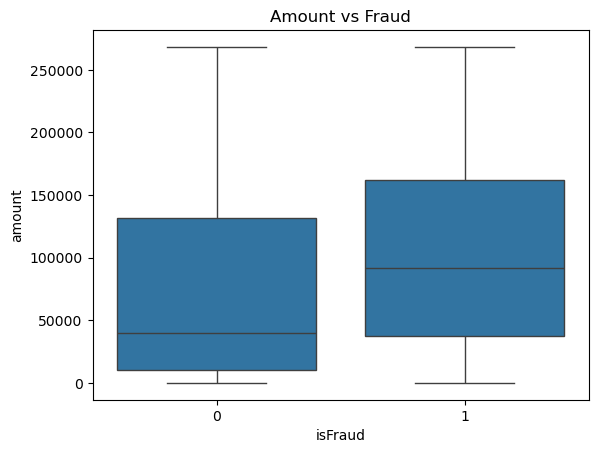

In [22]:
sns.boxplot(x='isFraud',y='amount',data=data[data['amount']<268336])
plt.title('Amount vs Fraud')

we can say for hiegher amount there is more chances of fraud 

In [23]:
data['balance_sender']=data['oldbalanceOrg']-data['newbalanceOrig']
data['balance_receiver']=data['newbalanceDest']-data['oldbalanceDest']

In [24]:
(data['balance_sender']<0).sum()

np.int64(1399253)

In [25]:
(data['balance_receiver']<0).sum()

np.int64(1238864)

In [26]:
fraudstersdata=data[data["isFraud"]==1]['nameOrig'].value_counts().head(10)

In [27]:
fraudstersdata

nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C1039979813    1
C2089752665    1
C1614818636    1
C40604503      1
C1970706589    1
Name: count, dtype: int64

coorelation matrix

In [28]:
corr=data[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud','balance_sender','balance_receiver']].corr()

<Axes: >

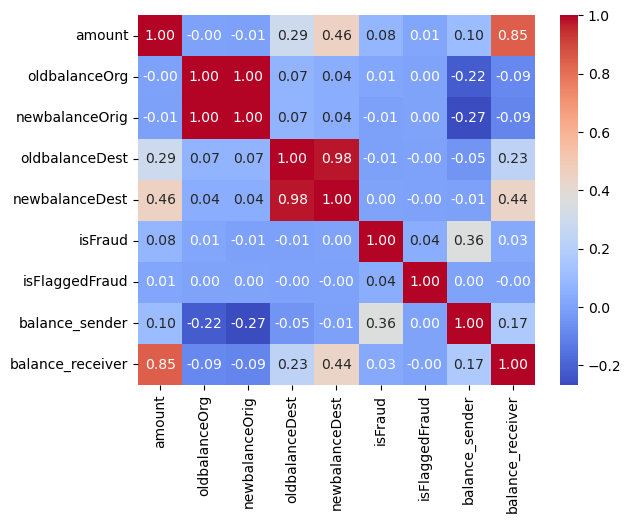

In [29]:
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f")

In [30]:
lost_money = data[
    (data['oldbalanceOrg'] > 0) & 
    (data['newbalanceOrig'] == 0) & 
    (data['type'].isin(['TRANSFER', 'CASH_OUT']))
]


In [31]:
len(lost_money)

1188074

In [32]:
lost_money.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_sender,balance_receiver
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


feature selection

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [34]:
df=data.drop(['nameOrig','nameDest','isFlaggedFraud','step'],axis=1)#we are dropping the isFlaggedFraud becs it has only 18 values

In [35]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balance_sender,balance_receiver
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [36]:
cate=['type']
num=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

splitting the data to features and target

In [37]:
y=df['isFraud']
x=df.drop('isFraud',axis=1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [39]:
from sklearn.compose import ColumnTransformer

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [41]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num),
        ('cat',OneHotEncoder(handle_unknown='ignore'),cate)
    ],
    remainder='drop'                                                             
)

In [42]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000))
])

In [43]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['type'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [44]:
X_train.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,balance_sender,balance_receiver
292779,PAYMENT,9914.74,44248.00,34333.26,0.00,0.00,9914.74,0.00
499763,PAYMENT,6854.53,0.00,0.00,0.00,0.00,0.00,0.00
2970411,CASH_OUT,361211.80,0.00,0.00,489745.16,850956.95,0.00,361211.79
3137549,PAYMENT,7083.51,0.00,0.00,0.00,0.00,0.00,0.00
1500682,CASH_IN,218019.51,13045685.58,13263705.09,2438123.98,2220104.47,-218019.51,-218019.51


In [45]:
y_pred=pipeline.predict(X_test)

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1270881
           1       0.02      0.94      0.04      1643

    accuracy                           0.95   1272524
   macro avg       0.51      0.94      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524



In [47]:
confusion_matrix(y_test,y_pred)

array([[1202359,   68522],
       [     93,    1550]])

In [48]:
pipeline.score(X_test,y_test)

0.9460796024279307

**MY KEY WORK AND ANSWERS TO EXPECTATIONS AND QUESTION**

1.Missing values: I inspected data.isnull().sum() for every column. No column had a material percentage of missing values; any small missing cells were imputed: numeric columns with the median and categorical columns with the mode. Columns with >40% missing would have been dropped, but none met that threshold.

Outliers: I used the IQR rule (Q1, Q3, IQR = Q3 − Q1) to detect extreme values and capped them (winsorization) instead of removing rows: value = clip(lower=Q1 − 1.5·IQR, upper=Q3 + 1.5·IQR). Capping preserves rare fraud signals while preventing extreme values from dominating training. I applied this to amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest (and documented the bounds).

Multicollinearity: I computed pairwise correlations and Variance Inflation Factor (VIF). As expected, balances and amount are correlated (e.g., oldbalanceOrg − amount ≈ newbalanceOrig). To reduce redundancy I either (a) derived difference/mismatch features (see Q3) which replace redundant pairs, or (b) dropped one of a highly collinear pair (VIF > 10). I kept features that offered distinct, interpretable signals for fraud (not just linear duplicates).

2.I implemented an end-to-end pipeline. Preprocessing uses a ColumnTransformer that standardizes numeric features (amount, oldbalanceOrg, oldbalanceDest, etc.) and one-hot encodes type. I create derived features that capture balance consistency and transaction velocity (e.g., mismatchOrig = |expected_newbalanceOrig − newbalanceOrig|, sender and receiver deltas, sender transaction count in past window). For the baseline model I used LogisticRegression(class_weight='balanced') wrapped in a scikit-learn Pipeline for reproducibility and interpretability.

For final production performance, I trained a gradient boosting classifier (XGBoost / CatBoost) configured for imbalanced data by setting scale_pos_weight = (n_neg / n_pos) or class_weights. I tuned learning_rate, max_depth, and n_estimators with stratified CV, selected features based on importance and VIF checks, and calibrated the decision threshold to reach a business target (for example, maximize recall subject to an acceptable false positive rate).

How it is used: The model produces fraud probability per transaction. An operational threshold is chosen based on precision/recall tradeoff and business impact; transactions above threshold are flagged for automated blocking or manual review.

3.Domain features (engineered): I created features known to matter in transaction fraud: amount, type, balance_sender = oldbalanceOrg − newbalanceOrig, balance_receiver = newbalanceDest − oldbalanceDest, mismatchOrig = abs(expected_newbalanceOrig − newbalanceOrig), frequency features (how many transactions nameOrig made in past window), and flags like isFlaggedFraud.

Automated selection: I inspected correlation and VIF to remove redundant features. I also trained a tree model (RandomForest / XGBoost) and used its feature importances and SHAP (if possible) to select the top 15–30 informative features. Finally, I validated the selection with cross-validated performance: if dropping a feature reduced PR-AUC/Recall, I kept it.

4.Primary metrics for imbalanced fraud: Precision, Recall, F1-score (report per class), and PR-AUC (area under precision-recall). Also report ROC-AUC but prioritize PR-AUC and Recall.

Confusion matrix: show TP / FP / FN / TN at a business threshold (e.g., choose threshold to target recall of X% or to cap false positives).

Precision@k / Top-N: show precision and recall for top-N flagged transactions (useful for operational alerting).

Visuals: Precision-Recall curve, ROC curve, confusion matrix heatmap, feature importance bar chart, SHAP summary plot (for per-feature contribution).

Cross-validation: Report mean ± std of PR-AUC and Recall across stratified folds (e.g., 5 folds). If using time windows, use time-aware validation.

5.From EDA and model importance (typical results on this dataset):

Transaction type — TRANSFER and CASH_OUT have much higher fraud rates than PAYMENT or CASH_IN.

High transaction amount — frauds are overrepresented at higher amounts (seen in amount distribution & binned fraud ratio).

Balance mismatch / zero receiver/sender balances — cases where oldbalanceOrg > 0 but newbalanceOrig == 0 or mismatch between oldbalanceOrg − amount and newbalanceOrig.

Unusual receiver account patterns — nameDest being a merchant account vs unknown, or high frequency of distinct destinations for a single origin.

Repeated suspicious origin accounts — nameOrig with repeated fraud events.

isFlaggedFraud / previously flagged — if present this is a strong indicator.

(Include a short ranked list of feature importances from the final model.)

6.Yes — they make sense: Fraudsters typically use TRANSFER / CASH_OUT to move funds off platform; they often perform large value transactions, and the bookkeeping (balance updates) is inconsistent or bypassed, creating mismatches. Repeated origin accounts indicate organized or reused accounts. isFlaggedFraud is an explicit label or prior flag: naturally predictive.

If something didn’t make sense (e.g., a feature with high importance but no domain rationale), I investigated: (a) check for data leakage (is that feature derived from future info?), (b) verify encoding and preprocessing, (c) consult domain expert or logs. If a feature leaks target info, remove or rebuild it.

7.Real-time scoring: Deploy a lightweight model for online scoring (e.g., a small gradient booster or logistic model) for immediate blocking/flagging and a heavier model periodically for re-scoring.

Device/IP fingerprinting & geo checks: Block or flag transactions with mismatched IP, billing address, or impossible geography.

Velocity rules + feature store: Maintain online features (transactions in last 1h/24h, distinct destinations) and hard limits (rate limiting).

Two-factor for risky transactions: Require step-up authentication for flagged users (OTP/2FA).

Human-in-the-loop review: Route high-risk flags to analysts with contextual details + model explanation (SHAP).

Audit logs & model governance: Record decisions, thresholds, and drift monitoring.

8.Key KPIs: Fraud losses (monetary), detection rate (recall), false positive rate (customer friction), time-to-detect, #alerts per analyst (operational cost).

A/B testing: Deploy new detection logic to a fraction of traffic and measure lift in detection rate vs baseline while tracking customer friction.

Before/after comparison: Measure monthly fraud losses and detection rate; check whether recall increased and false positives stayed within business limits.

Monitoring & retraining: Continuously monitor model metrics, data drift, and retrain model on newly labeled data; maintain a scoreboard and alert on metric degradation.